In [3]:
import yfinance as yf

# Example: Download Apple (AAPL) data for the past 5 years
data = yf.download('BTC-USD', start='2018-01-01', end='2025-02-02')

data.head()


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2018-01-01,13657.200195,14112.200195,13154.700195,14112.200195,10291200000
2018-01-02,14982.099609,15444.599609,13163.599609,13625.000000,16846600192
2018-01-03,15201.000000,15572.799805,14844.500000,14978.200195,16871900160
2018-01-04,15599.200195,15739.700195,14522.200195,15270.700195,21783199744
2018-01-05,17429.500000,17705.199219,15202.799805,15477.200195,23840899072


In [5]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2589 entries, 2018-01-01 to 2025-02-01
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, BTC-USD)   2589 non-null   float64
 1   (High, BTC-USD)    2589 non-null   float64
 2   (Low, BTC-USD)     2589 non-null   float64
 3   (Open, BTC-USD)    2589 non-null   float64
 4   (Volume, BTC-USD)  2589 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 121.4 KB


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
count,2589.000000,2589.000000,2589.000000,2589.000000,2.589000e+03
mean,28974.665026,29581.538591,28277.521006,28943.019954,2.728232e+10
std,23398.065836,23871.482942,22848.136093,23359.595356,1.994162e+10
min,3236.761719,3275.377930,3191.303467,3236.274658,2.923670e+09
25%,9078.762695,9237.573242,8828.469727,9078.308594,1.387896e+10
50%,22714.978516,23165.896484,22213.238281,22677.427734,2.422692e+10
75%,43442.855469,44135.367188,42529.019531,43300.226562,3.575957e+10
max,106146.265625,109114.882812,105291.734375,106147.296875,3.509679e+11


In [6]:
data.isnull().sum()

Price   Ticker 
Close   BTC-USD    0
High    BTC-USD    0
Low     BTC-USD    0
Open    BTC-USD    0
Volume  BTC-USD    0
dtype: int64

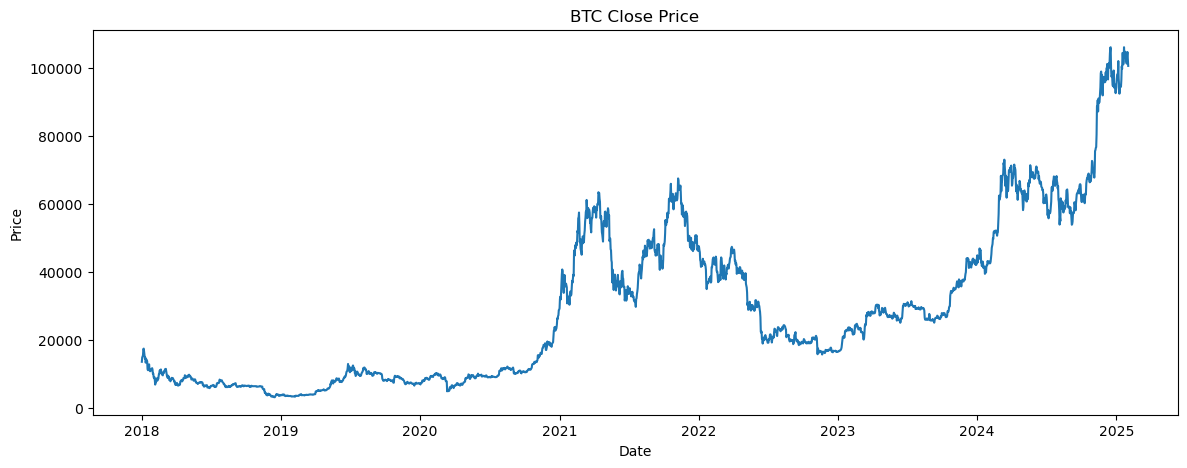

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(14,5))
plt.plot(data['Close'])
plt.title('BTC Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data[['Close']].values)

In [9]:
import numpy as np

def create_sequences(dataset, lookback=60):
    X, y = [], []
    for i in range(lookback, len(dataset)):
        X.append(dataset[i-lookback:i, 0])  # past 60 data points
        y.append(dataset[i, 0])            # next price
    return np.array(X), np.array(y)

lookback = 60
X, y = create_sequences(scaled_data, lookback)

# Reshape X to [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [11]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [13]:
model = Sequential()
# 50 LSTM units, return_sequences=True means we output sequences for the next LSTM layer
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))  # dropout to prevent overfitting

model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(1))  # we want a single numeric value for price

# Compile
model.compile(optimizer='adam', loss='mean_squared_error')

In [14]:
history = model.fit(
    X_train, y_train,
    batch_size=32,
    epochs=10,
    validation_data=(X_test, y_test)
)

Epoch 1/10
64/64 [==============================] - 10s 67ms/step - loss: 0.0067 - val_loss: 0.0016
Epoch 2/10
64/64 [==============================] - 3s 47ms/step - loss: 0.0011 - val_loss: 0.0069
Epoch 3/10
64/64 [==============================] - 3s 48ms/step - loss: 0.0011 - val_loss: 0.0018
Epoch 4/10
64/64 [==============================] - 3s 48ms/step - loss: 9.3542e-04 - val_loss: 0.0036
Epoch 5/10
64/64 [==============================] - 3s 48ms/step - loss: 9.4533e-04 - val_loss: 0.0013
Epoch 6/10
64/64 [==============================] - 3s 49ms/step - loss: 7.6325e-04 - val_loss: 0.0015
Epoch 7/10
64/64 [==============================] - 3s 48ms/step - loss: 7.6466e-04 - val_loss: 0.0021
Epoch 8/10
64/64 [==============================] - 3s 48ms/step - loss: 7.5416e-04 - val_loss: 9.6635e-04
Epoch 9/10
64/64 [==============================] - 3s 49ms/step - loss: 8.1893e-04 - val_loss: 0.0041
Epoch 10/10
64/64 [==============================] - 3s 48ms/step - loss: 7.3784

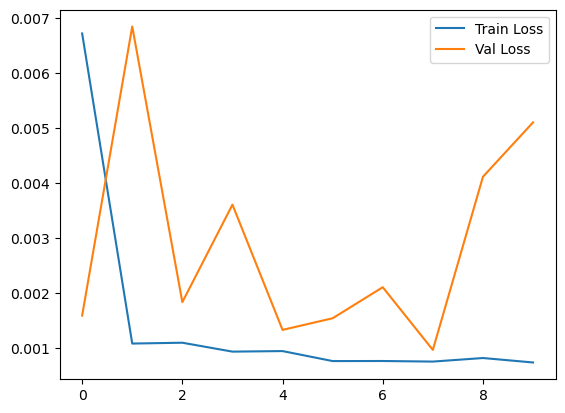

In [15]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()

In [16]:
predictions = model.predict(X_test)

16/16 [==============================] - 1s 13ms/step


In [17]:
predicted_prices = scaler.inverse_transform(predictions)
real_prices = scaler.inverse_transform(y_test.reshape(-1,1))

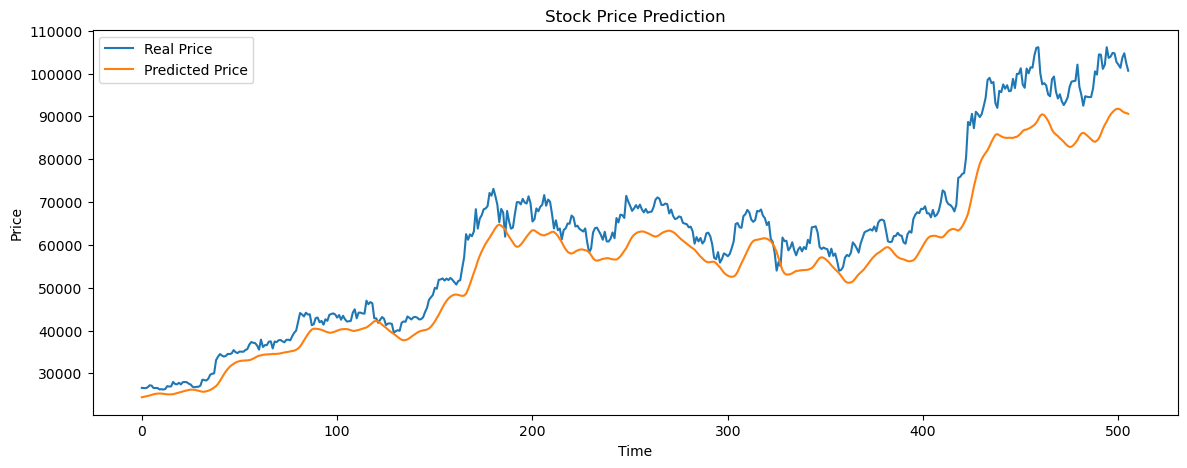

In [18]:
plt.figure(figsize=(14,5))
plt.plot(real_prices, label='Real Price')
plt.plot(predicted_prices, label='Predicted Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(real_prices, predicted_prices)
mae = mean_absolute_error(real_prices, predicted_prices)
rmse = mse ** 0.5

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)

MSE: 54100780.54294557
MAE: 6146.943610270504
RMSE: 7355.3232792954495
